In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import zipfile
import glob
from PIL import Image
import matplotlib.pyplot as plt

In [4]:
import zipfile
import os

zip_file_path = '/content/datasetulos.zip'
extracted_folder_path = '/content/extracted_dataset/'

try:
    # Ekstrak file ZIP
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_folder_path)
    print("File berhasil diekstrak ke folder:", extracted_folder_path)

    # Cek folder hasil ekstraksi
    dataset_folder = os.path.join(extracted_folder_path, 'dataset')
    if os.path.exists(dataset_folder):
        subfolders = os.listdir(dataset_folder)
        print("Isi folder dataset:", subfolders)
    else:
        print("Folder 'dataset' tidak ditemukan. Periksa struktur dataset Anda.")

except zipfile.BadZipFile:
    print("Kesalahan: File bukan file ZIP yang valid.")
except FileNotFoundError:
    print("Kesalahan: File ZIP tidak ditemukan.")

File berhasil diekstrak ke folder: /content/extracted_dataset/
Isi folder dataset: ['test_color', 'test_black', 'train_color', 'train_black']


In [5]:
# **Tahap 2: Definisi Struktur Dataset**
# Map kategori dengan subfolder
folders = {
    'test_color': os.path.join(dataset_folder, 'test_color'),
    'test_black': os.path.join(dataset_folder, 'test_black'),
    'train_color': os.path.join(dataset_folder, 'train_color'),
    'train_black': os.path.join(dataset_folder, 'train_black')
}

Kode ini mempersiapkan struktur folder dataset dan membuat tempat penyimpanan sementara (images, labels, image_counts) untuk memulai eksplorasi data. Dengan struktur ini, nantinya gambar-gambar dapat dimuat dan dilabeli sesuai kategori.

In [6]:
# **Tahap 3: Data Understanding**
# Muat gambar dari folder, resize ke ukuran 64x64, dan simpan sebagai fitur vektor
images = []
labels = []
image_counts = {}

def load_images_and_labels(folders):
    global images, labels, image_counts
    for label, folder_path in folders.items():
        if not os.path.exists(folder_path):
            print(f"Folder tidak ditemukan: {folder_path}")
            continue

        image_counts[label] = 0
        for image_path in glob.glob(os.path.join(folder_path, "*.*")):  # Mencari semua file gambar
            if image_path.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                try:
                    # Baca gambar dan preprocess
                    image = cv2.imread(image_path)
                    if image is None:
                        continue
                    image = cv2.resize(image, (64, 64))  # Resize ke ukuran 64x64
                    feature_vector = image.flatten()  # Ubah menjadi vektor 1D
                    images.append(feature_vector)
                    labels.append(label)
                    image_counts[label] += 1
                except Exception as e:
                    print(f"Error membaca gambar {image_path}: {e}")

# Panggil fungsi untuk memuat gambar dan label
load_images_and_labels(folders)

Jumlah gambar yang dimuat per folder:
test_color: 7 gambar
test_black: 7 gambar
train_color: 57 gambar
train_black: 57 gambar


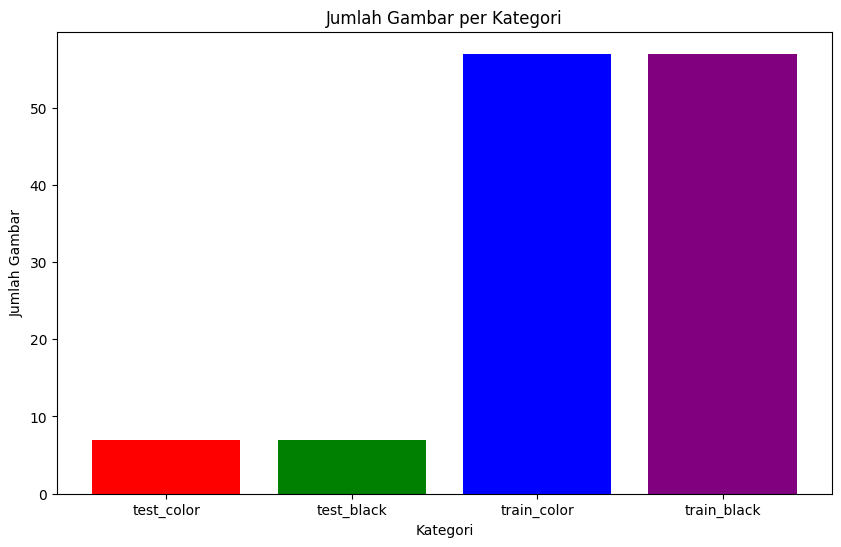

In [7]:
# **Tahap 4: Visualisasi Jumlah Gambar**
print("Jumlah gambar yang dimuat per folder:")
for label, count in image_counts.items():
    print(f"{label}: {count} gambar")

plt.figure(figsize=(10, 6))
plt.bar(image_counts.keys(), image_counts.values(), color=['red', 'green', 'blue', 'purple'])
plt.xlabel('Kategori')
plt.ylabel('Jumlah Gambar')
plt.title('Jumlah Gambar per Kategori')
plt.show()

In [8]:
# **Tahap 5: Konversi Data**
if len(images) == 0 or len(labels) == 0:
    raise ValueError("Dataset kosong. Pastikan dataset berisi gambar yang valid.")

X = np.array(images)
y = np.array(labels)

In [9]:
# **Tahap 6: Pembagian Dataset (Training dan Testing)**
if len(y) < 2:
    raise ValueError("Data tidak cukup untuk dibagi menjadi training dan testing.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# **Tahap 7: Melatih Model KNN**
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

Akurasi Model KNN: 61.54%


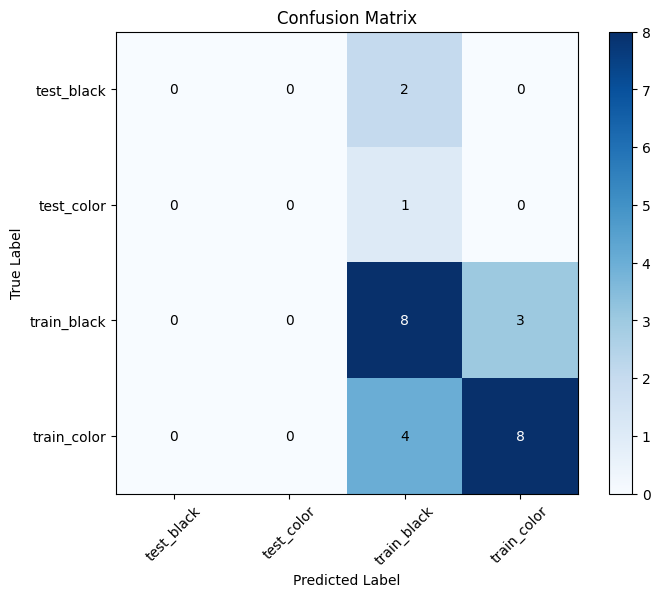

In [11]:
# **Tahap 8: Evaluasi Model**
y_pred = knn.predict(X_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi Model KNN: {accuracy * 100:.2f}%')

# Buat Confusion Matrix
unique_labels = np.unique(np.concatenate((y_test, y_pred)))
conf_matrix = confusion_matrix(y_test, y_pred, labels=unique_labels)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap='Blues')
plt.colorbar()
tick_marks = np.arange(len(unique_labels))
plt.xticks(tick_marks, unique_labels, rotation=45)
plt.yticks(tick_marks, unique_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Annotasi matriks
thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             ha="center", va="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.show()